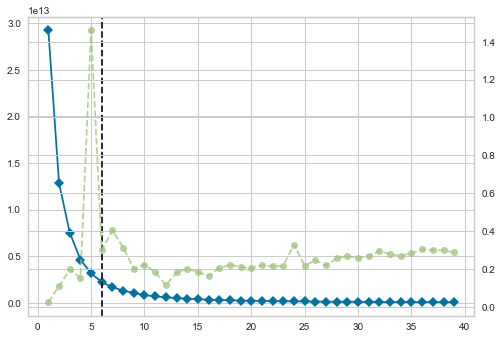

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer
### the elbow method for whatever data set

# read the data
cluster_df = pd.read_csv("MAIS202data.csv")
cl2 = cluster_df.iloc[:,1:]

####
# standardize the data
# X_std = StandardScaler().fit_transform(cluster_df)
####
# Elbow Method for K means using the library and checking from 1 to 40 clusters
# create a model and test for 1 to 40 clusters using the external library
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,40))
visualizer.fit(cl2) # Fit data to visualizer
# visualizer.show()        # Finalize and render figure
num_clus = visualizer.elbow_value_
num_clus = int(num_clus)
### The original dataset gives us the fact that elbow must be at 6 so the number of the clusters will be equal to seven

In [23]:
### second form of a code to determine the elbow
Sum_of_squared_distances = []
K = range(1,40)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(cluster_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Both methods show 6 as the number of the clusters - Approved!

ValueError: could not convert string to float: '2WN7xpcY4zmcqF57HFEGZY'

In [24]:
### now that we have the number of the clusters we have to create the clusters and visualize them all
### we use the erkan algorithm because based on the documentation, its more efficient than the others
kmeans_scale = KMeans(n_clusters=6, n_init=200, max_iter=500, init='k-means++', algorithm="elkan").fit(cl2)
kmeans = KMeans(n_clusters=6, n_init=200, max_iter=500, init='k-means++', algorithm="elkan")
labels_scale = kmeans_scale.labels_
kmeans.fit(cl2)

KMeans(algorithm='elkan', max_iter=500, n_clusters=6, n_init=200)

In [27]:
# the predict method gives us which cluster each point belongs to
print(kmeans.predict(cl2.iloc[:11,:]))
# the # of the clusters starts from 0 and the transform method tells you which clusters each point belongs to with what distance to the centroid
print(kmeans.transform(cl2.iloc[:11,:]))

# lets assume that until index 200 is our and after that is the users dataset
starting_index = 200
# initialize the final dictionary
dictionary = {}
for cluster_index in range(num_clus):
    dictionary[cluster_index] = ([],0)

# should parallely iterate thru the ids and the features
kmeans.predict(cl2.iloc[starting_index:,:])

#

[0 5 5 2 2 2 2 2 2 2 0]
[[  3970.15544557 402669.70246681  43567.02664283 198870.71658882
  801389.07774781  69426.58259923]
 [ 47034.85719081 351664.70313309  94572.02752543 147865.71816933
  750384.07841734  18421.59168896]
 [ 41691.85673031 357007.70298545  89229.02723121 153208.71781289
  755727.07829218  23764.5879238 ]
 [ 25935.1494399  424634.70271567  21602.02873562 220835.71694741
  823354.07799829  91391.58300895]
 [ 26357.14922351 425056.70270652  21180.02861909 221257.71694202
  823776.07799346  91813.58296322]
 [ 27056.15260604 425755.70297334  20481.03272555 221956.71747256
  824475.0782919   92512.58395543]
 [ 87307.14917175 486006.70299211  39769.97905864 282207.71745627
  884726.07837315 152763.58365397]
 [ 98023.14890431 496722.70303342  50485.97804308 292923.71746805
  895442.07838606 163479.58359497]
 [117072.14853742 515771.70300185  69534.97696371 311972.71737707
  914491.07836118 182528.58345006]
 [ 57164.15069469 455863.70312509   9626.995425   252064.71769099
 

/Users/shahradmz/Desktop/MusicPlaylistGeneratorAIModel/Pywork/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



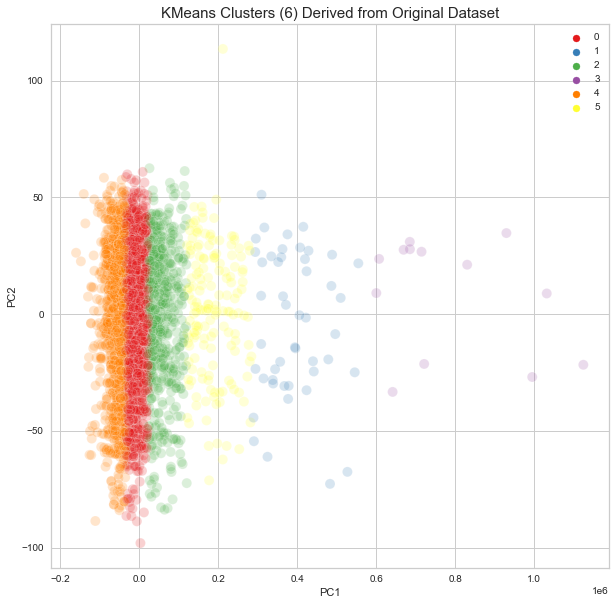

In [80]:
from sklearn.decomposition import PCA

### we have to reduce the number of the features using PCA -> standard scale the data points to be better visualized - first 2D

# Create a PCA instance: pca

pca2 = PCA(n_components=3).fit(cluster_df)
pca2d = pca2.transform(cluster_df)
plt.figure(figsize = (10,10))
sns.scatterplot(pca2d[:,0], pca2d[:,1],
                hue=labels_scale,
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (6) Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [81]:
### Then 3D visualization

Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
labels = labels_scale
trace = go.Scatter3d(x=pca2d[:,0], y=pca2d[:,1], z=pca2d[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'gray',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [99]:
trial = pd.read_csv("MAIS202data.csv")
df1 = trial.iloc[:10,:]
df2 = trial.iloc[10:20,:]
pd.concat([df1, df2])
# trial.index.size

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2WN7xpcY4zmcqF57HFEGZY,0.799,0.569,0,-7.821,1,0.3180,0.154000,0.000000,0.1510,0.417,125.074,206600,4
1,0k1WUmIRnG3xU6fvvDVfRG,0.803,0.597,11,-6.035,0,0.1410,0.000619,0.000005,0.3230,0.331,136.008,257605,4
2,3QFInJAm9eyaho5vBzxInN,0.711,0.611,1,-5.453,1,0.3300,0.005880,0.000000,0.2300,0.144,134.093,252262,4
3,7FdmHr87G79PDRGy9SPBkZ,0.949,0.683,9,-4.242,1,0.0946,0.019900,0.000000,0.1710,0.887,130.012,184635,4
4,40uMIn2zJLAQhNXghRjBed,0.797,0.631,3,-3.818,0,0.0786,0.090400,0.000004,0.0998,0.288,129.915,184213,4
5,25r6MZ4Gtd76l43qnZI1DG,0.800,0.541,10,-5.050,0,0.0375,0.025200,0.000000,0.1460,0.194,135.990,183514,4
6,1t9WgS8FN0534tLBRwbaxO,0.719,0.648,3,-7.600,0,0.1250,0.200000,0.000000,0.1270,0.660,140.201,123263,4
7,0cu0rhnlCnJ7JIeHRiLpj3,0.902,0.669,1,-5.049,1,0.4570,0.161000,0.000000,0.0728,0.628,139.949,112547,4
8,2sU586qrQQhByPLqEF7pLX,0.909,0.601,9,-5.848,1,0.4020,0.050400,0.000000,0.1060,0.623,140.280,93498,4
9,3skWb4hadA0lTaowADujyY,0.833,0.498,10,-5.196,0,0.1170,0.049300,0.000000,0.1190,0.259,139.928,153406,4
